Import

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [55]:
from datetime import datetime




In [2]:
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/cleandata.csv')

x=data.iloc[:, :-1]
y = data.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)

In [3]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)


Train the decision tree model

In [4]:
clt = DecisionTreeClassifier()
clt.fit(x_train,y_train)

y_pred_train = clt.predict(x_train)
y_pred_test = clt.predict(x_test)


Calculate the accuracy of the model

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,  y_pred_test)


0.8967297762478486

Calculate the classification report of the model


Training Accuracy score: 0.997845756139595
Testing Accuracy score: 0.8967297762478486
DecisionTreeClassifier score: 0.997845756139595
classification_report 
               precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       244
         1.0       0.90      0.93      0.91       337

    accuracy                           0.90       581
   macro avg       0.90      0.89      0.89       581
weighted avg       0.90      0.90      0.90       581



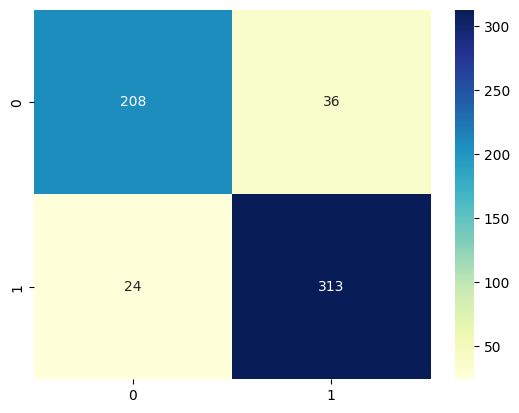

In [6]:
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("DecisionTreeClassifier score:",clt.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()